In [ ]:
# ------------------------
# SETUP AND IMPORTS
# ------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# DATA LOADING 
# ------------------------
# use the delimiter | and handle bad lines
df = pd.read_csv(
	'../../data/MachineLearningRating_v3.txt',
	delimiter="|",
	engine='python',
	on_bad_lines='skip'   
)

In [ ]:
# print file structure and desciption
df.head()
df.info()
df.describe()

In [ ]:
df.isnull().sum()
df.isnull().mean().sort_values(ascending=False)
df['CustomValueEstimate'] = df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median())


In [ ]:
# Calculate the overall loss ratio
df[['TotalPremium', 'TotalClaims']].describe()
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

In [ ]:
# total count by province
plt.figure()
df['Province'].value_counts().plot(kind='bar')
plt.title('Policy Count by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()

In [ ]:
# Monthly claims and premiums
sns.heatmap(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].corr(), annot=True)
df.groupby('Province')['LossRatio'].mean().sort_values().plot(kind='bar', title='Loss Ratio by Province')
df.groupby('VehicleType')['LossRatio'].mean().sort_values().plot(kind='bar', title='Loss Ratio by Vehicle Type')
df.groupby('Gender')['LossRatio'].mean().plot(kind='bar', title='Loss Ratio by Gender')
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period("M")).agg({'TotalClaims': 'sum', 'TotalPremium': 'sum'})
monthly.plot(title='Monthly Total Claims and Premiums')


In [ ]:
# Lowest claim vehicles against vehicle model
df.groupby(['make', 'Model'])['TotalClaims'].mean().sort_values(ascending=False).head(10).plot(kind='barh', title='Highest Claim Vehicles')
df.groupby(['make', 'Model'])['TotalClaims'].mean().sort_values().head(10).plot(kind='barh', title='Lowest Claim Vehicles')


In [ ]:
# Display missing values
df.isnull().sum()
df.isnull().mean().sort_values(ascending=False)
df['CustomValueEstimate'] = df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median())


<Axes: xlabel='Province'>

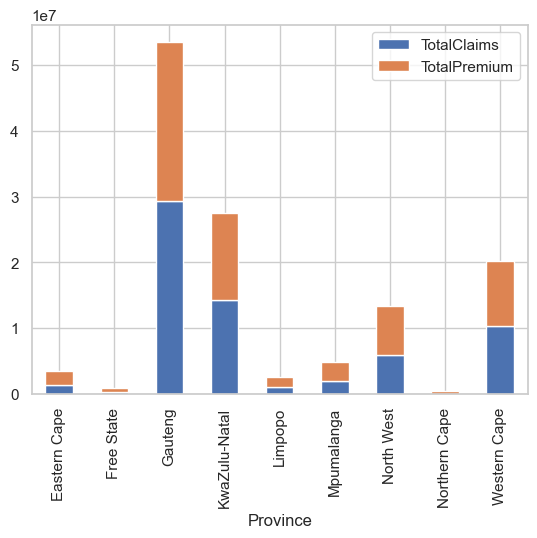

In [ ]:
# visualize the total claims and premiums by province
df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum().plot(kind='bar', stacked=True)

<Axes: xlabel='Province', ylabel='TotalClaims'>

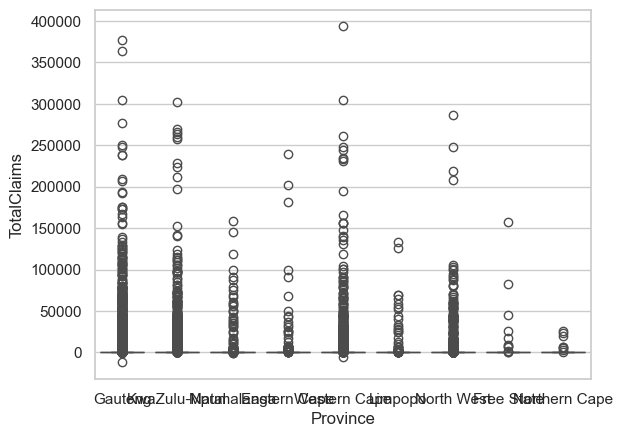

In [62]:
sns.boxplot(data=df, x='Province', y='TotalClaims')

<Axes: title={'center': 'Loss Ratio by Province and Vehicle Type'}, xlabel='Province', ylabel='LossRatio'>

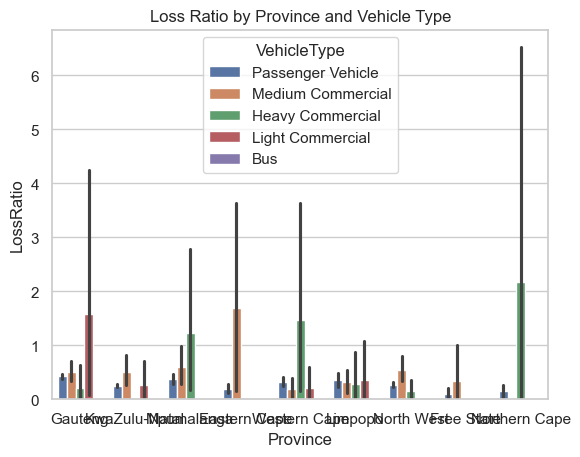

In [ ]:
# Visualize the loss ratio by province and vehicle type
sns.set(style="whitegrid")
plt.title("Loss Ratio by Province and Vehicle Type")
sns.barplot(data=df, x="Province", y="LossRatio", hue="VehicleType")

In [ ]:
# export the cleaned data to a CSV file
df.to_csv("../../data/insurance_data_clean.csv", index=False)
